In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [107]:
dataset = pd.read_csv("heart.csv")
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [108]:
dataset.shape

(303, 14)

In [109]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [110]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [111]:
print(dataset.corr()["target"])

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
target      1.000000
Name: target, dtype: float64


[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd766798e50>


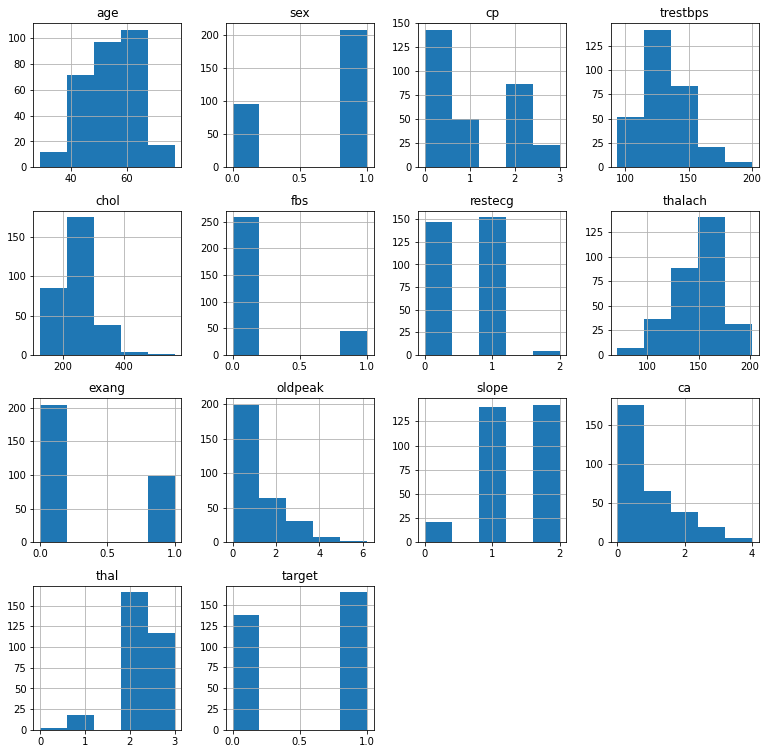

In [112]:
a1=dataset.hist(bins=5,figsize=(13,13))
print(a1)

target variable

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


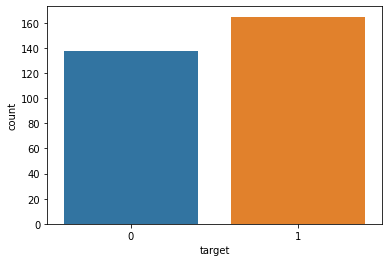

In [113]:
y = dataset["target"]
sns.countplot(y)

'Sex' feature

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


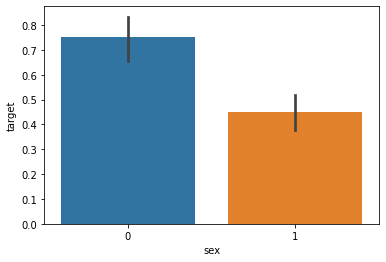

In [114]:
dataset["sex"].unique()
sns.barplot(dataset["sex"],y)

Chest Pain Type'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


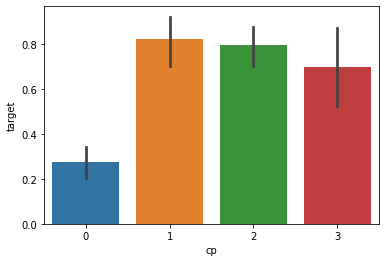

In [115]:
dataset["cp"].unique()
sns.barplot(dataset["cp"],y)

In [116]:
x=dataset.drop("target",axis=1)
y=dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [117]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


### logistic regression

In [118]:
lr = LogisticRegression(max_iter=500)
lr.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [119]:
Y_pred_lr = lr.predict(X_test)

In [120]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)
print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


### SVM

In [121]:
sv = svm.SVC(kernel='linear')
sv.fit(X_train, Y_train)
Y_pred_svm = sv.predict(X_test)

In [122]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)
print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %



### Naive Bayes

In [123]:
nb = GaussianNB()
nb.fit(X_train,Y_train)
Y_pred_nb = nb.predict(X_test)

In [124]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)
print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


### K Nearest Neighbors

In [125]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [126]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)
print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


### Decision Tree

In [127]:
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [128]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 78.69 %


### Random Forest

In [129]:
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [130]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 85.25 %


### XGBoost

In [131]:
xgb_model = xgb.XGBClassifier(max_depth=7,objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)
Y_pred_xgb = xgb_model.predict(X_test)

In [132]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)
print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 81.97 %


###Neural Network

In [133]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)
X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

print (X_train.shape, Y_train.shape)
print (X_train.shape, Y_test.shape)

(242, 13) (242,)
(242, 13) (61,)


In [134]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard

model = Sequential()
model.add(Dense(30, input_dim=13, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(15, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer="Adamax", metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 30)                420       
_________________________________________________________________
dropout_6 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 15)                465       
_________________________________________________________________
dropout_7 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 16        
Total params: 901
Trainable params: 901
Non-trainable params: 0
_________________________________________________________________


In [101]:
history=model.fit(X_train, Y_train, validation_split=0.33, epochs=100, batch_size=5)

Epoch 1/100
33/33 [==============================] - 1s 9ms/step - loss: 0.6931 - accuracy: 0.5639 - val_loss: 0.6928 - val_accuracy: 0.5250
Epoch 2/100
33/33 [==============================] - 0s 5ms/step - loss: 0.6926 - accuracy: 0.5407 - val_loss: 0.6924 - val_accuracy: 0.5250
Epoch 3/100
33/33 [==============================] - 0s 4ms/step - loss: 0.6923 - accuracy: 0.5116 - val_loss: 0.6917 - val_accuracy: 0.5250
Epoch 4/100
33/33 [==============================] - 0s 4ms/step - loss: 0.6905 - accuracy: 0.5568 - val_loss: 0.6904 - val_accuracy: 0.5250
Epoch 5/100
33/33 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5172 - val_loss: 0.6888 - val_accuracy: 0.5250
Epoch 6/100
33/33 [==============================] - 0s 3ms/step - loss: 0.6882 - accuracy: 0.5269 - val_loss: 0.6865 - val_accuracy: 0.5250
Epoch 7/100
33/33 [==============================] - 0s 3ms/step - loss: 0.6857 - accuracy: 0.5121 - val_loss: 0.6834 - val_accuracy: 0.5250
Epoch 8/100
3

In [102]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("score %s: %.2f%%" % (model.metrics_names[1], score[1]*100))

score accuracy: 88.52%


In [103]:
model.summary()
score = model.evaluate(X_test, Y_test, verbose=2)
score1=round(score[1]*100,2)
print('Model Accuracy = ',round(score[1]*100,2))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 30)                420       
_________________________________________________________________
dropout_4 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 15)                465       
_________________________________________________________________
dropout_5 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 16        
Total params: 901
Trainable params: 901
Non-trainable params: 0
_________________________________________________________________
2/2 - 0s - loss: 0.3544 - accuracy: 0.8852
Model Accuracy =  88.52


In [104]:
s= [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score1]
a= ["Logistic Regression","Naive Bayes","SVM","KNN","Decision Tree","Random Forest","XGBoost","Keras Neural Network"]    

for i in range(len(a)):
    print("Accuracy score of "+a[i]+" is: "+str(s[i])+" %")

Accuracy score of Logistic Regression is: 85.25 %
Accuracy score of Naive Bayes is: 85.25 %
Accuracy score of SVM is: 81.97 %
Accuracy score of KNN is: 67.21 %
Accuracy score of Decision Tree is: 75.41 %
Accuracy score of Random Forest is: 83.61 %
Accuracy score of XGBoost is: 81.97 %
Accuracy score of Keras Neural Network is: 88.52 %


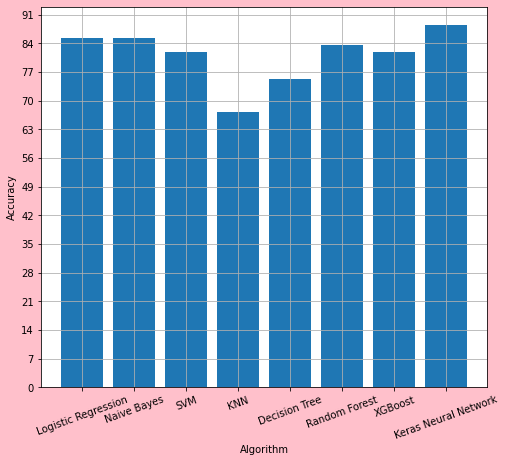

In [154]:
fig, ax = plt.subplots(1,1,figsize=(8,7))
y_ticks = np.arange(0, 95, 7)
fig.patch.set_facecolor('pink')
plt.yticks(y_ticks)
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.xticks(rotation = 20)
ax.grid(True)
ax.bar(a,s)
plt.show()